In [1]:
import sys
sys.path.append('..')
sys.path.append('../Modules')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(os.getcwd())
if 'notebook' in os.getcwd():
    # os.chdir("../scripts") # go from Neural-Modeling/notebooks to Neural-Modeling/scripts, where simulation outputs will be generated to. (maybe a separate folder could be used...)
    os.chdir("../simulations") # go to output folder
    print(os.getcwd())

/home/drfrbc/Neural-Modeling/notebooks
/home/drfrbc/Neural-Modeling/simulations


In [2]:
sim_dir ='/home/drfrbc/Neural-Modeling/simulations/2025-05-23-10-13-baseline_no_clusters/complex'

FOR SEC_TYPE: tuft
keys (terminal ends):


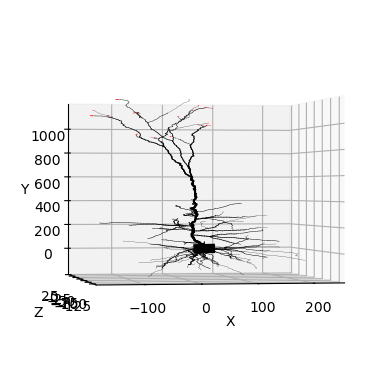

terminal ends:


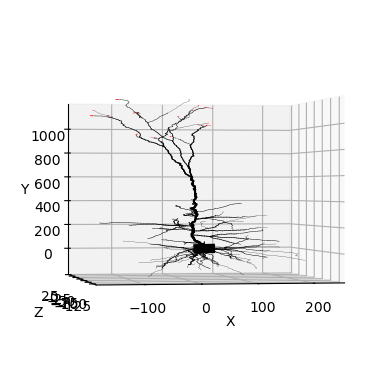

path to terminal end: 1631


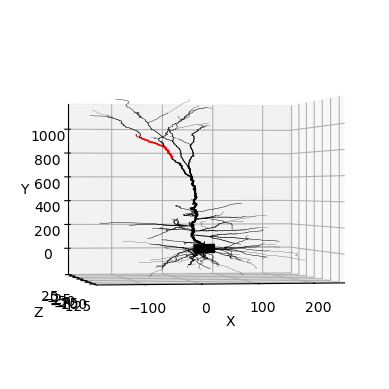

path to terminal end: 1684


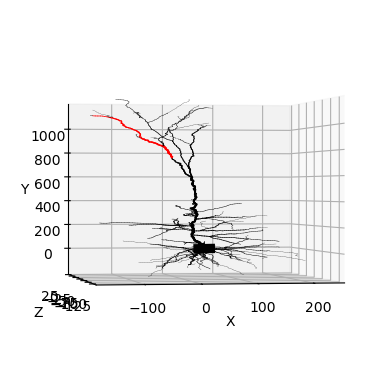

path to terminal end: 1689


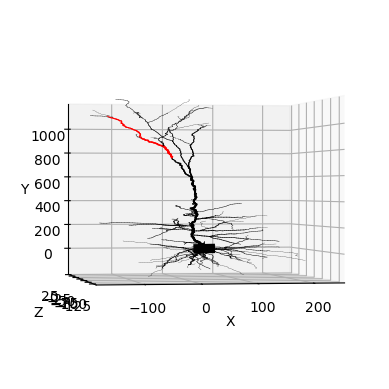

path to terminal end: 1706


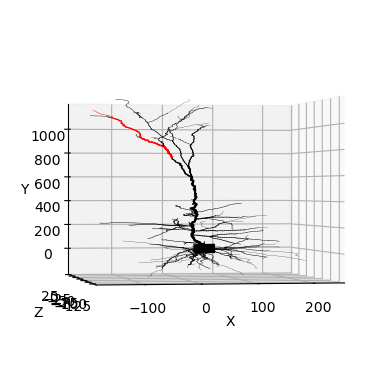

path to terminal end: 1729


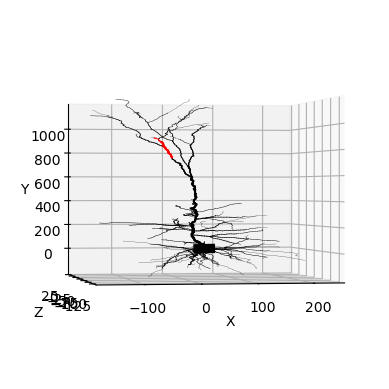

path to terminal end: 1732


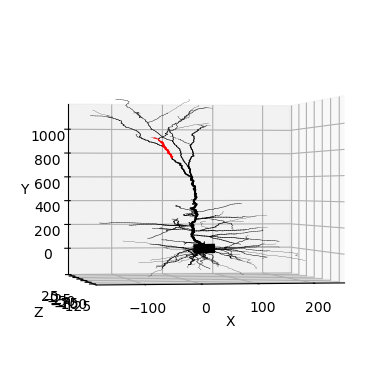

path to terminal end: 1757


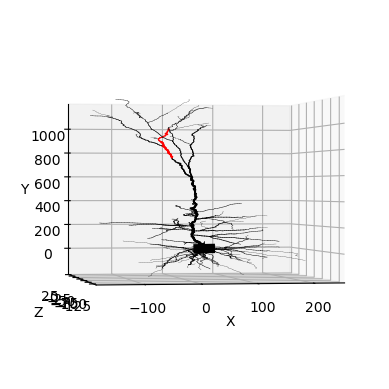

path to terminal end: 1837


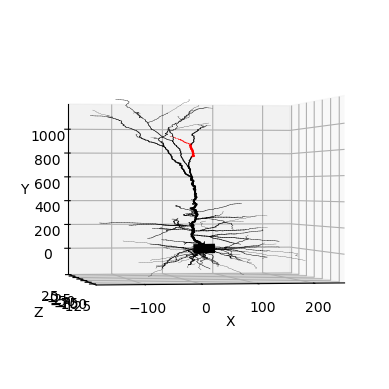

path to terminal end: 1880


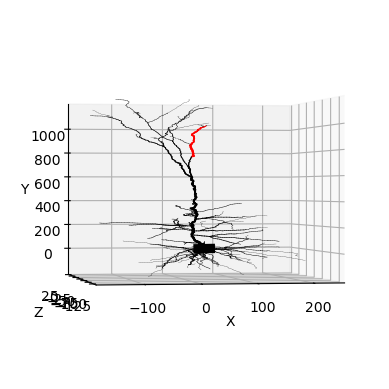

path to terminal end: 1883


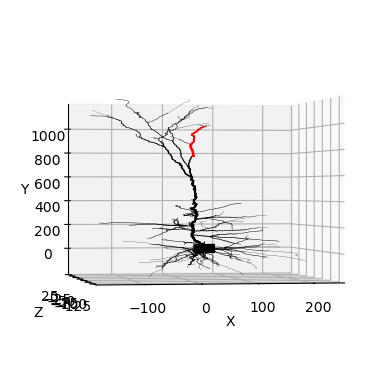

path to terminal end: 1890


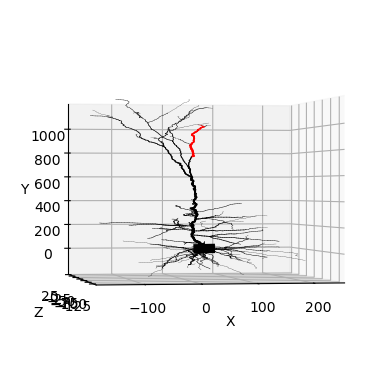

path to terminal end: 1892


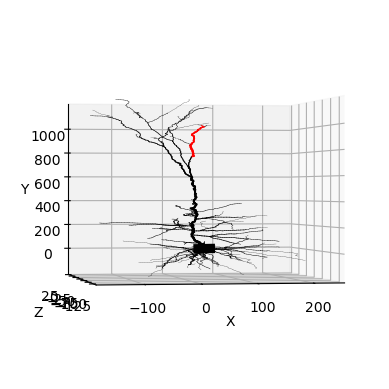

path to terminal end: 2016


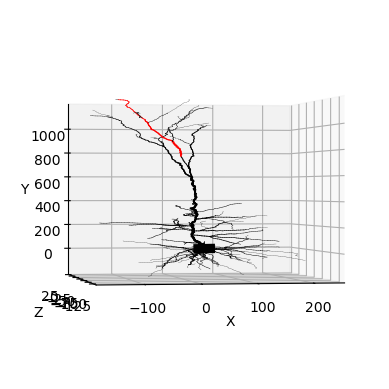

path to terminal end: 2041


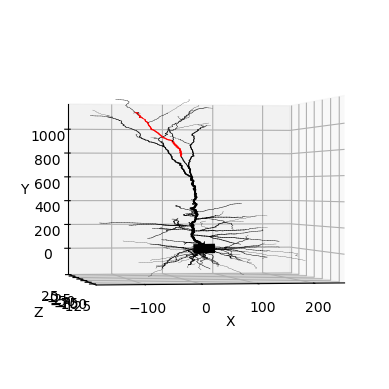

path to terminal end: 2047


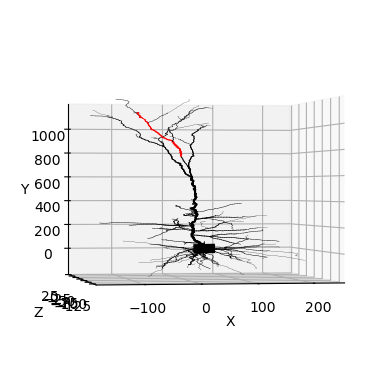

path to terminal end: 2086


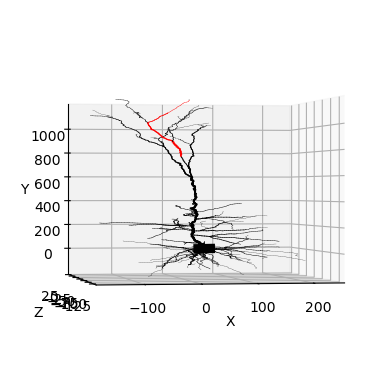

path to terminal end: 2145


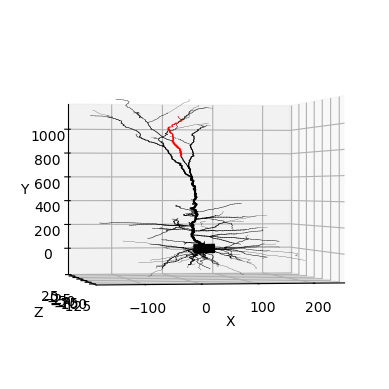

path to terminal end: 2165


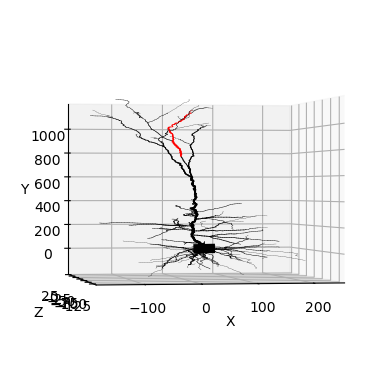

path to terminal end: 2179


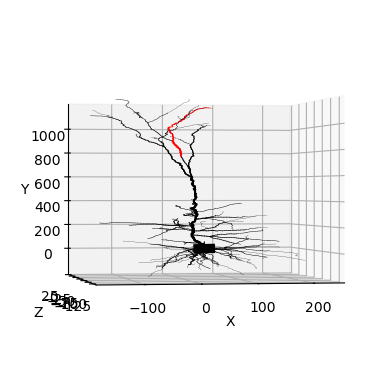

path to terminal end: 2230


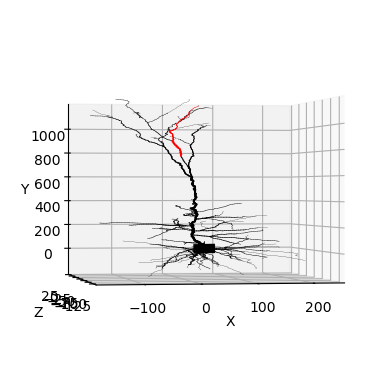

path to terminal end: 2259


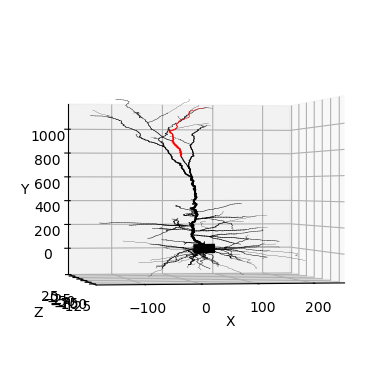

path to terminal end: 2283


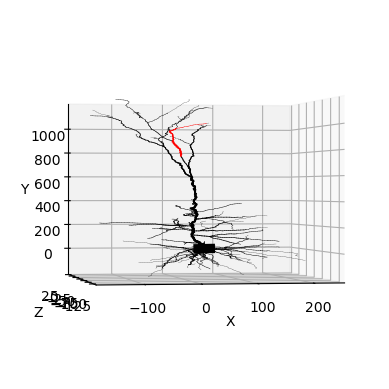

In [3]:
import Modules.adjacency as adjacency
sec_type_to_do = 'tuft'
adj_matrix = np.loadtxt(os.path.join(os.path.abspath(sim_dir), "adj_matrix.txt"))
terminal_seg_indices = adjacency.get_terminal_seg_indices(adj_matrix)
terminal_seg_indices
seg_data = pd.read_csv(os.path.join(os.path.abspath(sim_dir), "segment_data.csv"))
terminal_segments_of_type = seg_data[(seg_data['seg_id'].isin(terminal_seg_indices)) & (seg_data['sec_type_precise'].isin([sec_type_to_do]))]
terminal_segments_of_type_ids = terminal_segments_of_type['seg_id'].tolist()

# find the ascendants of each of the terminal segments of type (sticking to the sec_type_precise)
branches_dict = adjacency.get_all_ascendant_seg_indices_of_type(adjacency_matrix=adj_matrix,
                                      start_segments=terminal_segments_of_type_ids,
                                      seg_data=seg_data,
                                      sec_type_to_get=sec_type_to_do)


print(f"FOR SEC_TYPE: {sec_type_to_do}")
# plot terminal indices to be sure
from Modules.plot_morphology import plot_reduced_morphology
print(f"keys (terminal ends):")
plot_reduced_morphology(seg_data, deleted_indices=branches_dict.keys())

print(f"terminal ends:")
plot_reduced_morphology(seg_data, deleted_indices=terminal_segments_of_type_ids)

# # plot the highlighted branches
# from Modules.plot_morphology import plot_reduced_morphology
for terminal_seg_id, seg_indices_of_branch in branches_dict.items():
    print(f"path to terminal end: {terminal_seg_id}") #-> {seg_indices_of_branch}")
    plot_reduced_morphology(seg_data, deleted_indices=seg_indices_of_branch)


In [4]:
seg_data[(seg_data['seg_id'].isin(branches_dict.keys()))]

,section,idx_in_section_type,seg_half_seg_RA,L,length,seg,pseg,Section_L,Section_diam,Distance,...,pc_2,p1_0,p1_1,p1_2,r,dl_0,dl_1,dl_2,seg_id,sec_type_precise
1631,apic,39,11.978344,4.893921,4.893921,L5PCtemplate[0].apic[39](0.95),L5PCtemplate[0].apic[39](0.85),48.939213,0.510000,1036.627390,...,2.341922,-60.939999,952.969971,1.000000,0.255000,1.088951,3.766293,-2.688065,1631,tuft
1684,apic,42,12.175281,4.974383,4.974383,L5PCtemplate[0].apic[42](0.944444),L5PCtemplate[0].apic[42](0.833333),44.769445,0.510000,1244.572493,...,6.850579,-148.910004,1106.030029,8.070000,0.255000,-4.248737,1.707782,1.420743,1684,tuft
1689,apic,43,46.030043,4.887738,4.887738,L5PCtemplate[0].apic[43](0.9),L5PCtemplate[0].apic[43](0.7),24.438690,0.460081,1224.285061,...,3.414471,-114.449997,1108.589966,3.320000,0.130000,3.171108,2.544708,-1.711312,1689,tuft
1706,apic,44,46.630902,4.951541,4.951541,L5PCtemplate[0].apic[44](0.970588),L5PCtemplate[0].apic[44](0.911765),84.176192,0.260000,1277.257641,...,-29.588444,-156.619995,1135.569946,-30.670000,0.130000,-3.232577,3.122495,-2.004322,1706,tuft
1729,apic,47,29.194513,3.100043,3.100043,L5PCtemplate[0].apic[47](0.75),L5PCtemplate[0].apic[47](0.25),6.200087,0.260000,1004.402742,...,10.120943,-19.980000,929.099976,10.300000,0.130000,1.275356,2.537902,0.574597,1729,tuft
1732,apic,48,36.506671,3.876491,3.876491,L5PCtemplate[0].apic[48](0.833333),L5PCtemplate[0].apic[48](0.5),11.629473,0.260000,1009.443905,...,12.852329,-30.010000,931.659973,13.070000,0.130000,-2.989407,0.545638,0.959095,1732,tuft
1757,apic,49,45.210123,4.919240,4.919240,L5PCtemplate[0].apic[49](0.98),L5PCtemplate[0].apic[49](0.94),122.981012,0.770000,1099.922227,...,12.483595,1.880000,994.840027,12.620000,0.131596,-1.062279,-4.714362,0.372754,1757,tuft
1837,apic,52,46.643503,4.952879,4.952879,L5PCtemplate[0].apic[52](0.978261),L5PCtemplate[0].apic[52](0.934783),113.916212,0.510000,1015.634807,...,9.463793,7.460000,934.500000,9.670000,0.130000,0.099622,-2.607846,0.915143,1837,tuft
1880,apic,55,8.842656,3.612792,3.612792,L5PCtemplate[0].apic[55](0.75),L5PCtemplate[0].apic[55](0.25),7.225584,0.510000,1108.978304,...,11.333297,79.970001,1030.859985,11.950000,0.255000,2.232256,1.499035,0.851730,1880,tuft
1883,apic,56,42.504235,4.513347,4.513347,L5PCtemplate[0].apic[56](0.833333),L5PCtemplate[0].apic[56](0.5),13.540042,0.260000,1114.842485,...,10.787299,86.910004,1031.719971,11.270000,0.130000,1.872947,3.585090,0.818102,1883,tuft


path to terminal end: 2016


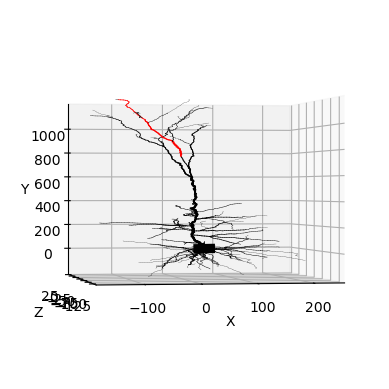

path to terminal end: 2179


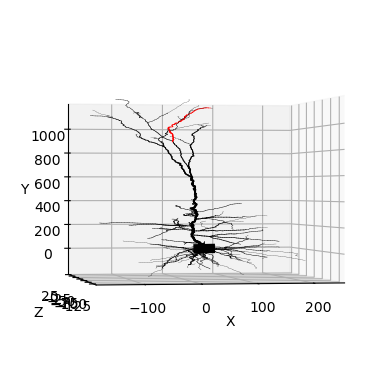

path to terminal end: 2086


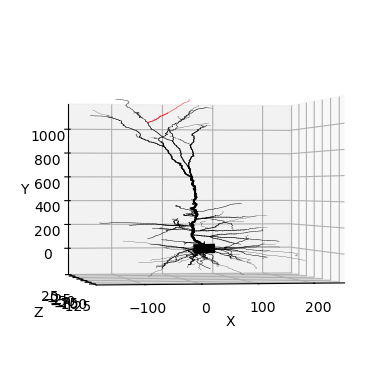

path to terminal end: 1706


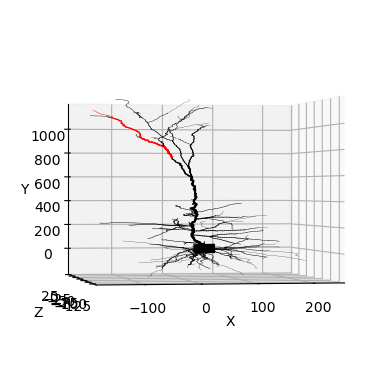

path to terminal end: 2259


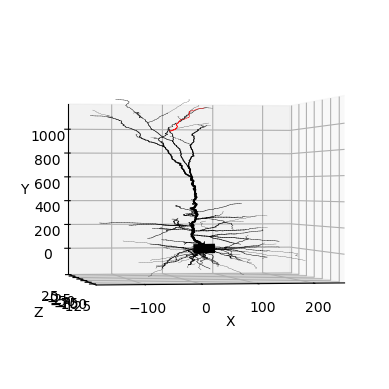

path to terminal end: 2230


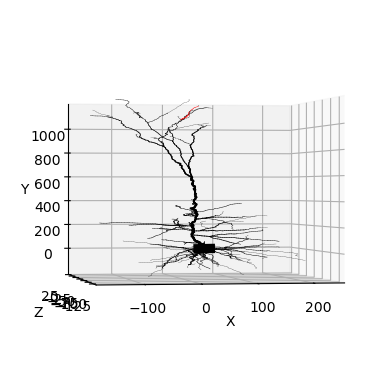

path to terminal end: 2047


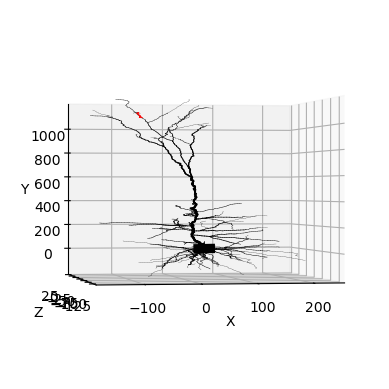

path to terminal end: 2165


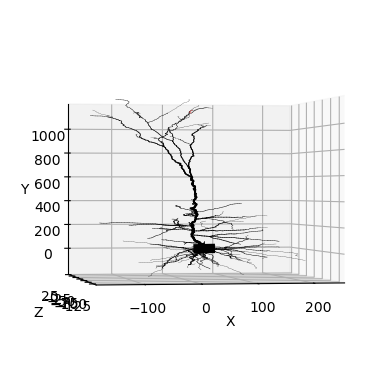

path to terminal end: 2041


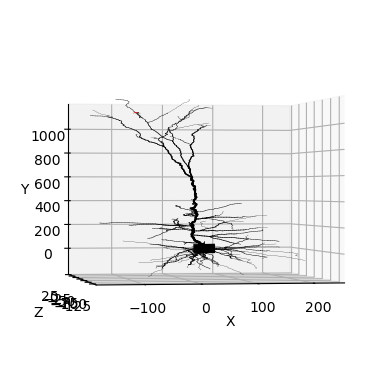

path to terminal end: 1684


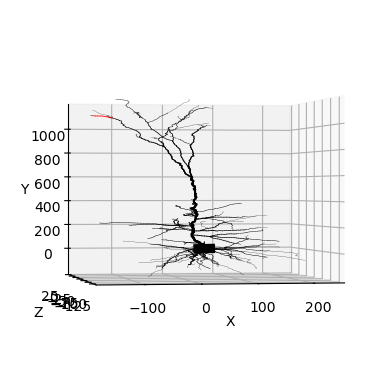

path to terminal end: 1689


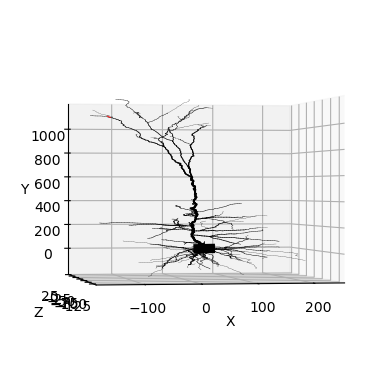

path to terminal end: 2145


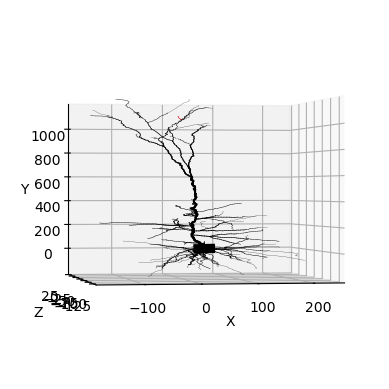

path to terminal end: 2283


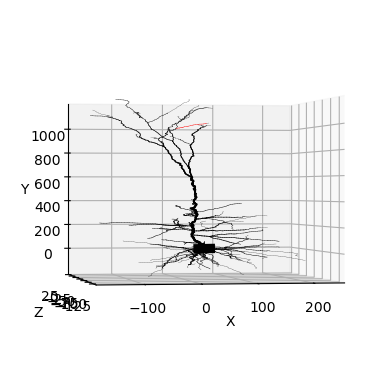

path to terminal end: 1890


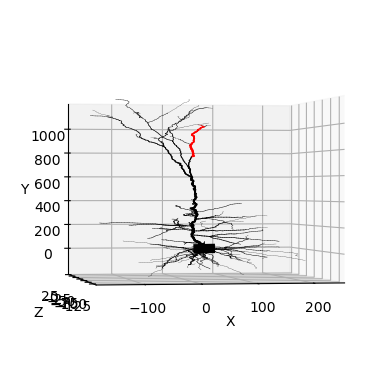

path to terminal end: 1892


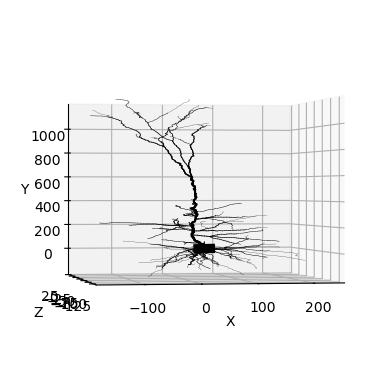

path to terminal end: 1883


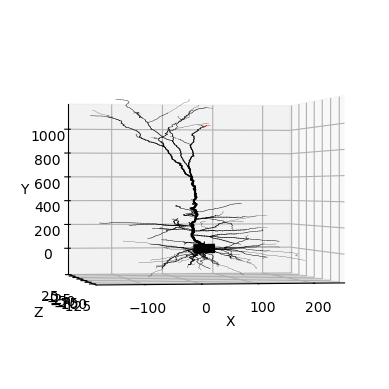

path to terminal end: 1880


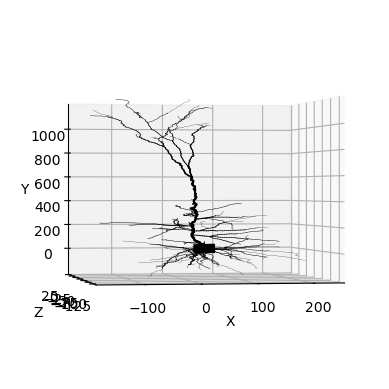

path to terminal end: 1757


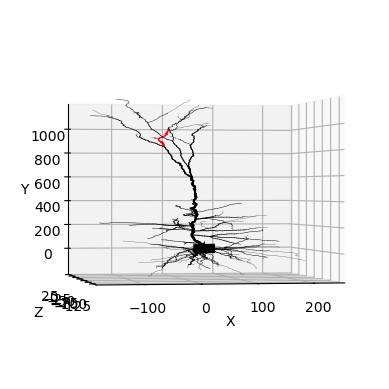

path to terminal end: 1631


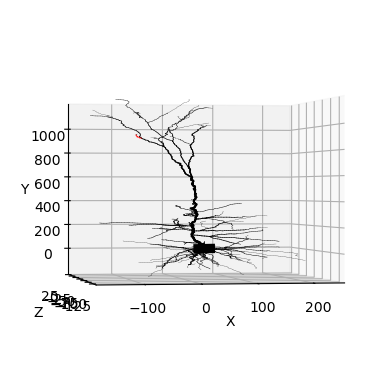

path to terminal end: 1732


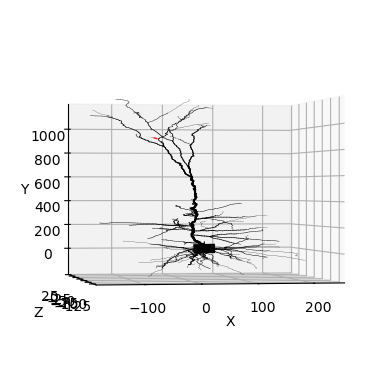

path to terminal end: 1729


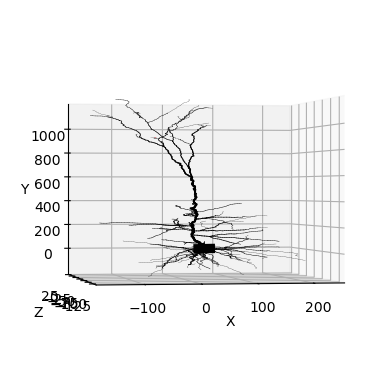

path to terminal end: 1837


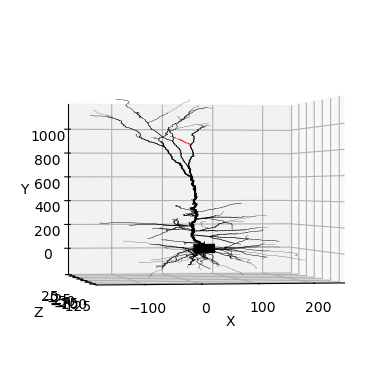

In [5]:
# clean up branches_dict, ensuring that no branches contain seg_ids that were in other branches.
unique_branches_dict = {}
used_segments = set()

# Sort branches by length (longer branches get priority)
sorted_branches = sorted(branches_dict.items(), key=lambda x: len(x[1]), reverse=True)

for branch_end, branch_seg_ids in sorted_branches:
    # Only keep segments that haven't been used in other branches
    unique_segments = branch_seg_ids - used_segments
    if unique_segments:  # Only add branch if it has unique segments
        unique_branches_dict[branch_end] = unique_segments
        used_segments.update(unique_segments)

# Replace original dictionary with cleaned version
# branches_dict = unique_branches_dict


# # plot the cleaned branches
# for terminal_seg_id, seg_indices_of_branch in unique_branches_dict.items():
#     print(f"path to terminal end: {terminal_seg_id}") #-> {seg_indices_of_branch}")
#     plot_reduced_morphology(seg_data, deleted_indices=seg_indices_of_branch)


In [6]:
# calculate the total length of each of the branches and the center coordinates of the branch.
# Calculate branch lengths and center coordinates
branch_stats = {}
for terminal_seg_id, seg_indices in unique_branches_dict.items():
    # Get segments in this branch
    branch_segments = seg_data[seg_data['seg_id'].isin(seg_indices)]
    
    # Calculate total length
    total_length = branch_segments['length'].sum()
    
    # Calculate center coordinates by averaging segment centers
    center_x = branch_segments['pc_0'].mean()
    center_y = branch_segments['pc_1'].mean() 
    center_z = branch_segments['pc_2'].mean()
    
    branch_stats[terminal_seg_id] = {
        'total_length': total_length,
        'center_coords': (center_x, center_y, center_z)
    }

# Print results
print("\nBranch Statistics:")
print("-----------------")
for terminal_id, stats in branch_stats.items():
    print(f"\nTerminal segment {terminal_id}:")
    print(f"Total length: {stats['total_length']:.2f}")
    print(f"Center coordinates (x,y,z): ({stats['center_coords'][0]:.2f}, {stats['center_coords'][1]:.2f}, {stats['center_coords'][2]:.2f})")


Branch Statistics:
-----------------

Terminal segment 2016:
Total length: 497.83
Center coordinates (x,y,z): (-54.61, 983.56, -62.58)

Terminal segment 2179:
Total length: 362.37
Center coordinates (x,y,z): (12.45, 1030.49, -20.27)

Terminal segment 2086:
Total length: 187.82
Center coordinates (x,y,z): (-35.70, 1101.04, -89.13)

Terminal segment 1706:
Total length: 475.26
Center coordinates (x,y,z): (-64.42, 955.42, -10.51)

Terminal segment 2259:
Total length: 245.84
Center coordinates (x,y,z): (20.75, 1068.68, -21.08)

Terminal segment 2230:
Total length: 132.06
Center coordinates (x,y,z): (26.62, 1115.52, -29.18)

Terminal segment 2047:
Total length: 123.04
Center coordinates (x,y,z): (-67.02, 1098.08, -25.56)

Terminal segment 2165:
Total length: 30.96
Center coordinates (x,y,z): (36.60, 1135.26, -11.40)

Terminal segment 2041:
Total length: 12.28
Center coordinates (x,y,z): (-63.12, 1129.39, -1.74)

Terminal segment 1684:
Total length: 46.53
Center coordinates (x,y,z): (-123.92

In [7]:
# combine short branches into their nearest neighbor.
import numpy as np
from branch_statistics import branch_statistics

# Calculate branch lengths and center coordinates
branch_stats = {}
for terminal_seg_id, seg_indices in unique_branches_dict.items():
    # Get segments in this branch
    branch_segments = seg_data[seg_data['seg_id'].isin(seg_indices)]
    
    # Calculate total length
    total_length = branch_segments['length'].sum()
    
    # Calculate center coordinates by averaging segment centers
    center_x = branch_segments['pc_0'].mean()
    center_y = branch_segments['pc_1'].mean() 
    center_z = branch_segments['pc_2'].mean()
    
    branch_stats[terminal_seg_id] = {
        'total_length': total_length,
        'center_coords': (center_x, center_y, center_z)
    }

def calculate_distance(coord1, coord2):
    """Calculate Euclidean distance between two 3D coordinates."""
    return np.sqrt(sum((a - b) ** 2 for a, b in zip(coord1, coord2)))

def combine_short_branches(branch_stats, length_threshold=50.0):
    """
    Combine branches shorter than the threshold with their nearest neighbors.
    Returns a new dictionary with combined branches.
    """
    # Create a copy of the original statistics
    combined_stats = branch_stats.copy()
    
    # Find all branches shorter than threshold
    short_branches = {
        branch_id: stats 
        for branch_id, stats in branch_stats.items() 
        if stats['total_length'] < length_threshold
    }
    
    # Process each short branch
    for short_id, short_stats in short_branches.items():
        if short_id not in combined_stats:
            continue  # Skip if already combined
            
        # Find the nearest longer branch
        min_distance = float('inf')
        nearest_branch = None
        
        for branch_id, branch_stats in combined_stats.items():
            if branch_id == short_id:
                continue
                
            distance = calculate_distance(
                short_stats['center_coords'],
                branch_stats['center_coords']
            )
            
            if distance < min_distance:
                min_distance = distance
                nearest_branch = branch_id
        
        if nearest_branch:
            # Combine the branches
            nearest_stats = combined_stats[nearest_branch]
            
            # Calculate new center coordinates (weighted by length)
            total_length = short_stats['total_length'] + nearest_stats['total_length']
            new_center = tuple(
                (short_stats['center_coords'][i] * short_stats['total_length'] +
                 nearest_stats['center_coords'][i] * nearest_stats['total_length']) / total_length
                for i in range(3)
            )
            
            # Update the nearest branch with combined statistics
            combined_stats[nearest_branch] = {
                'total_length': total_length,
                'center_coords': new_center
            }
            
            # Remove the short branch
            del combined_stats[short_id]
    
    return combined_stats

# Combine short branches
combined_branch_stats = combine_short_branches(branch_stats)

# Print results
print("\nCombined Branch Statistics:")


Combined Branch Statistics:


In [8]:
# Write combined branch statistics to a file
output_file = '../branch_statistics_combined.py'

with open(output_file, 'w') as f:
    f.write('combined_branch_statistics = {\n')
    for terminal_id, stats in combined_branch_stats.items():
        f.write(f'    {terminal_id}: {{\n')
        f.write(f"        'total_length': {stats['total_length']:.2f},\n")
        f.write(f"        'center_coords': ({stats['center_coords'][0]:.2f}, {stats['center_coords'][1]:.2f}, {stats['center_coords'][2]:.2f})\n")
        f.write('    },\n')
    f.write('}\n')

print(f"Combined branch statistics written to {output_file}")

Combined branch statistics written to ../branch_statistics_combined.py


## new test. get for each sec_type and store all_branch_statistics with keys sec_types and then same formatting as branch_statistics_combined.py.

In [ ]:
import os
import pandas as pd
import numpy as np
from Modules.segments_file import generate_segments_csv
from Modules.cell_builder import CellBuilder, SkeletonCell
from Modules.constants import HayParameters
from neuron import h

def get_branch_statistics_by_section_type(sim_dir, parameters):
    """
    Generate branch statistics organized by section type.
    
    Args:
        sim_dir (str): Directory containing simulation data
        parameters (HayParameters): Simulation parameters
        
    Returns:
        dict: Dictionary containing branch statistics organized by section type
    """
    # Build the cell
    cell_builder = CellBuilder(getattr(SkeletonCell, parameters.skeleton_cell_type), parameters)
    cell, _ = cell_builder.build_cell()
    
    # Get all segments
    segments, seg_data = cell.get_segments(["all"])
    
    # Get section types
    sec_types_to_get = np.unique([sec_type for syn_properties in [parameters.exc_syn_properties, parameters.inh_syn_properties] 
                                 for sec_type in syn_properties.keys()])
    
    # Initialize statistics dictionary
    branch_statistics = {sec_type: {} for sec_type in sec_types_to_get}
    
    # Process each section type
    for sec_type in sec_types_to_get:
        try:
            # Get segments of this type
            type_segments = cell.get_segments_of_type(sec_type)
            
            # Group segments by branch
            branch_segments = {}
            for seg in type_segments:
                sec_name = seg.sec.name()
                if sec_name not in branch_segments:
                    branch_segments[sec_name] = []
                branch_segments[sec_name].append(seg)
            
            # Calculate statistics for each branch
            for branch_name, segs in branch_segments.items():
                # Calculate total length
                total_length = sum(seg.L for seg in segs)
                
                # Calculate center coordinates
                coords = np.array([seg.coords for seg in segs])
                center_coords = tuple(np.mean(coords, axis=0))
                
                # Store statistics
                branch_id = int(branch_name.split('[')[1].split(']')[0])
                branch_statistics[sec_type][branch_id] = {
                    'total_length': round(total_length, 2),
                    'center_coords': tuple(round(x, 2) for x in center_coords)
                }
                
        except ValueError:
            # Skip if section type is not implemented
            continue
    
    return branch_statistics

# Example usage:
if __name__ == "__main__":
    # Create parameters
    parameters = HayParameters(
        "test",
        all_synapses_off=True,
        exc_clustering={},
        skeleton_cell_type="L5PCtemplate"
    )
    
    # Get statistics
    sim_dir = "simulations/test"
    os.makedirs(sim_dir, exist_ok=True)
    stats = get_branch_statistics_by_section_type(sim_dir, parameters)
    
    # Print statistics
    for sec_type, branches in stats.items():
        print(f"\n{sec_type}:")
        for branch_id, data in branches.items():
            print(f"  Branch {branch_id}:")
            print(f"    Total length: {data['total_length']}")
            print(f"    Center coordinates: {data['center_coords']}")